# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import statsmodels.api as sm

# Upload Dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv', na_values=['?', '', ' '])

# Description of raw Data

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(df.shape)

(10000, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# extract categorical variables
st = [col for col in df.columns if df[col].dtype==object]
cat = df[st]
cat.head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [8]:
for column in st:
    print(cat[column].unique())

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
['France' 'Spain' 'Germany']
['Female' 'Male']


As we see, in geography column there is only 3 country: France, Spain, Germany


## Data Vizualization

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Distribution of CreditScore, Age and EstimatedSalary

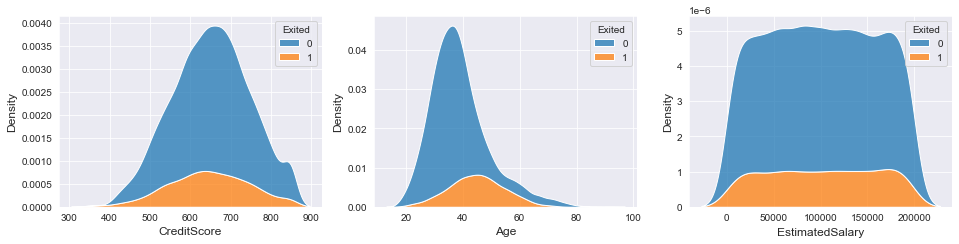

In [10]:
plt.figure(figsize=(16,3.5))
    
plt.subplot(1,3,1)
sns.kdeplot(x=df['CreditScore'], shade=True, multiple="stack", hue=df['Exited'])
plt.xlabel('CreditScore', size=12)
plt.ylabel('Density', size=12)

plt.subplot(1,3,2)
sns.kdeplot(x=df['Age'], shade=True, multiple="stack", hue=df['Exited'])
plt.xlabel('Age', size=12)
plt.ylabel('Density', size=12)

plt.subplot(1,3,3)
sns.kdeplot(x=df['EstimatedSalary'], shade=True, multiple="stack", hue=df['Exited'])
plt.xlabel('EstimatedSalary', size=12)
plt.ylabel('Density', size=12)

plt.show()

From graphs, we can see that CreditScore and EstimatedSalay distribution for both Exited and not Eited employees are almost same, but on Age column graph, we can clearly see that employees who left company on average are more older that ones who stayed. For exact numbers, lets create boxplots:

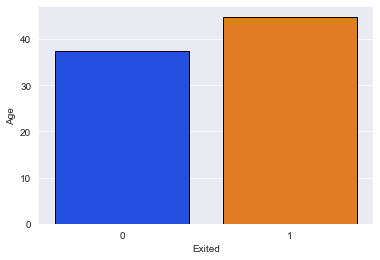

Average Age of employees who exited: 45.0 years
Average Age of employees who stayed: 37.0 years


In [11]:
a = df.loc[df['Exited']==1, 'Age'].mean()

b = df.loc[df['Exited']!=1, 'Age'].mean()

sns.barplot(x='Exited', y='Age', data=df,
            ci=False,
            edgecolor='black', palette='bright')

plt.show()

print("Average Age of employees who exited: " + str(round(a, 0)) + ' years')
print("Average Age of employees who stayed: " + str(round(b, 0)) + ' years')

### Boxplots

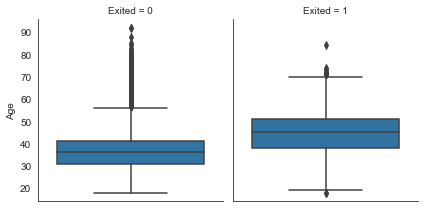

In [56]:
g = sns.FacetGrid(df, col='Exited')
g.map_dataframe(sns.boxplot, y='Age')
plt.show()

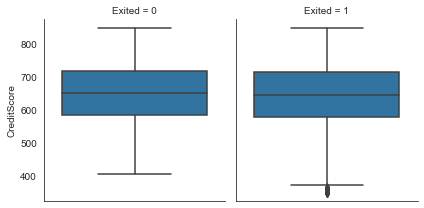

In [57]:
g = sns.FacetGrid(df, col='Exited')
g.map_dataframe(sns.boxplot, y='CreditScore')
plt.show()

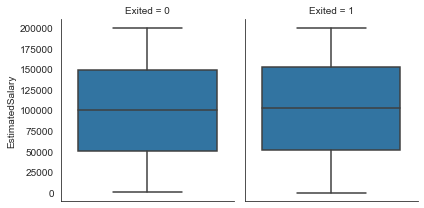

In [58]:
g = sns.FacetGrid(df, col='Exited')
g.map_dataframe(sns.boxplot, y='EstimatedSalary')
plt.show()

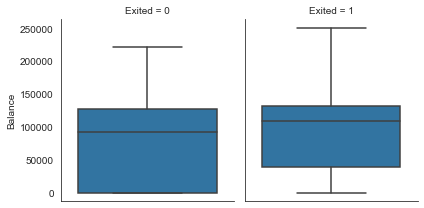

In [59]:
g = sns.FacetGrid(df, col='Exited')
g.map_dataframe(sns.boxplot, y='Balance')
plt.show()

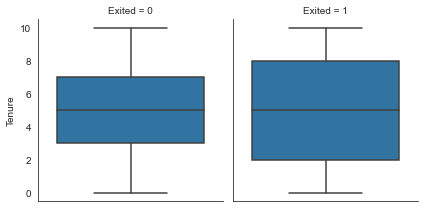

In [60]:
g = sns.FacetGrid(df, col='Exited')
g.map_dataframe(sns.boxplot, y='Tenure')
plt.show()

### Quick Review of Other Columns

In [12]:
print(pd.pivot_table(df, index = 'Exited', columns = 'Geography', values = 'Surname' ,aggfunc ='count'))
print('----------------------------------')
print(pd.pivot_table(df, index = 'Exited', columns = 'IsActiveMember', values = 'Surname' ,aggfunc ='count'))
print('---------------------------')
print(pd.pivot_table(df, index = 'Exited', columns = 'Gender', values = 'Surname' ,aggfunc ='count'))
print('---------------------')
print(pd.pivot_table(df, index = 'Exited', columns = 'HasCrCard', values = 'Surname' ,aggfunc ='count'))
print('---------------------')

Geography  France  Germany  Spain
Exited                           
0            4204     1695   2064
1             810      814    413
----------------------------------
IsActiveMember     0     1
Exited                    
0               3547  4416
1               1302   735
---------------------------
Gender  Female  Male
Exited              
0         3404  4559
1         1139   898
---------------------
HasCrCard     0     1
Exited               
0          2332  5631
1           613  1424
---------------------


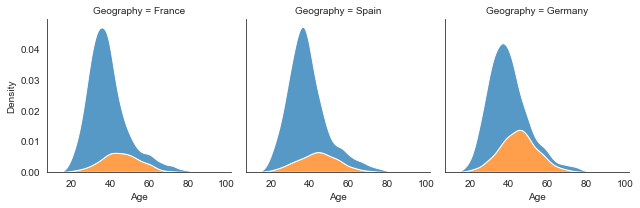

In [67]:
g = sns.FacetGrid(df, col='Geography')
g.map_dataframe(sns.kdeplot, shade=True, multiple="stack", x='Age', hue='Exited')
plt.show()

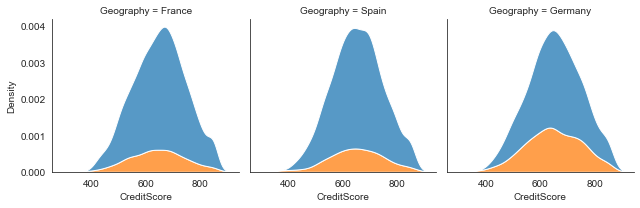

In [68]:
g = sns.FacetGrid(df, col='Geography')
g.map_dataframe(sns.kdeplot, shade=True, multiple="stack", x='CreditScore', hue='Exited')
plt.show()

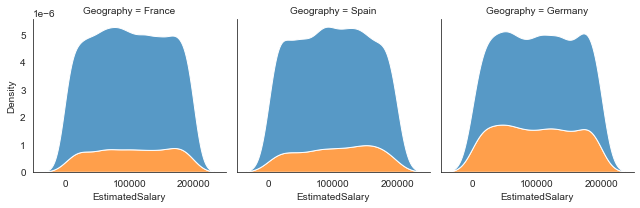

In [69]:
g = sns.FacetGrid(df, col='Geography')
g.map_dataframe(sns.kdeplot, shade=True, multiple="stack", x='EstimatedSalary', hue='Exited')
plt.show()

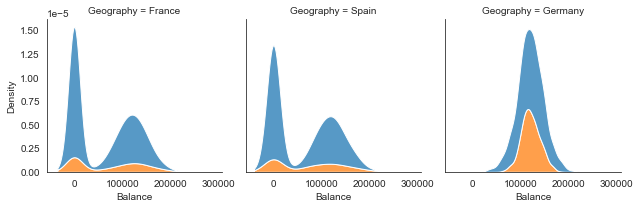

In [73]:
g = sns.FacetGrid(df, col='Geography')
g.map_dataframe(sns.kdeplot, shade=True, multiple="stack", x='Balance', hue='Exited')
plt.show()

### Some Scatterplots

<Figure size 1152x504 with 0 Axes>

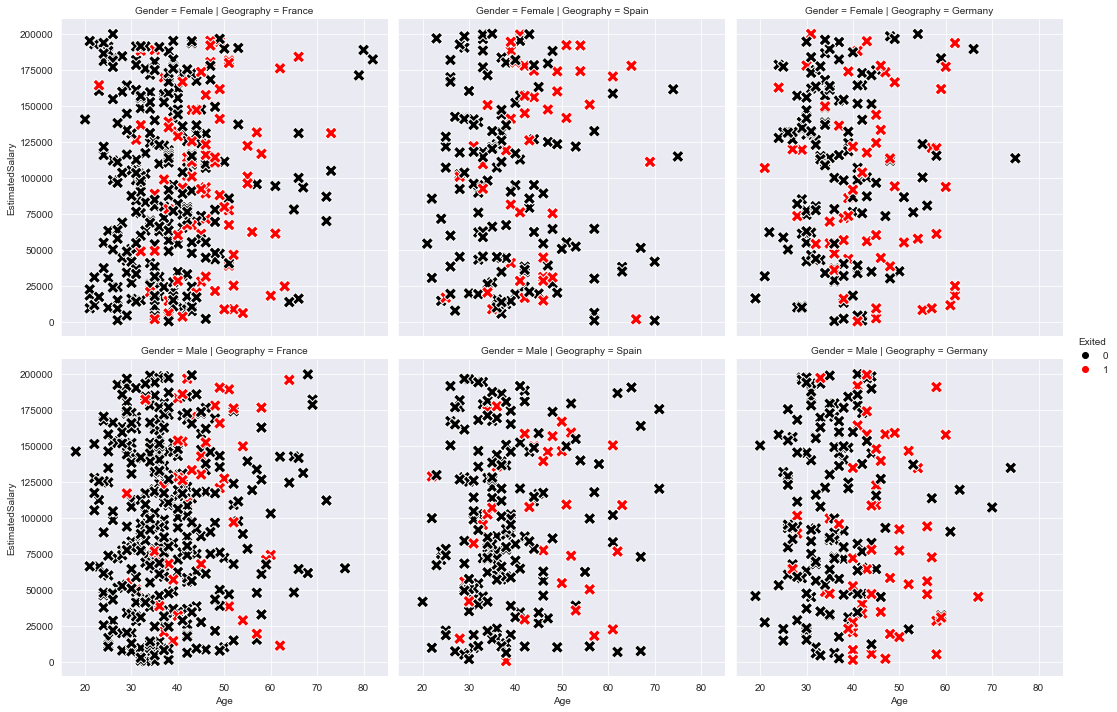

In [14]:
plt.figure(figsize=(16,7))

sns.relplot(x=df['Age'][:1500], y=df['EstimatedSalary'][:1500],
           hue=df['Exited'][:1500],
           s=150,
           palette=['black', 'red'],
           marker='X',
           col=df['Geography'][:1500],
           row=df['Gender'][:1500])
plt.show()

In [15]:
sns.set_style('white')

# Data Cleaning

Lets start crating dummy variables. To avoid so-called dummy variables trap, we will generate k-1 dummy variable for every categorical column (note: in this case we need only geography and gender columns).

In [16]:
dummies = pd.get_dummies(df[['Geography', 'Gender']], drop_first=True, dtype=int)
dummies.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [17]:
data = pd.concat([df, dummies], axis=1)
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,0,1


# Methodology

Firstly, our problem is to create model which predicts whether employee exited or not the company. In other words, our problem is classification problem, so for modeling we will use LogisticRegression and DecisionTreeClassifier, and ansemble model.

# Train-Test-Split strategy

Firstly lets generate X and y matrixs. We will exclude columns like RowNumber, CustomerId, Surname as they are unique values
and do not have explanatory power. Also we will exclude variables Geography and Gender because we already have corresponding dummy variables

In [18]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [19]:
predictors = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
             'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']
response = 'Exited'

X = data[predictors]
y = data[[response]]

Now lets generate train-test X and y

In [20]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size=0.2, random_state=2)

print(X_train_df.shape)
print(X_test_df.shape)
print(y_train_df.shape)
print(y_test_df.shape)

(8000, 11)
(2000, 11)
(8000, 1)
(2000, 1)


In [21]:
train_data = pd.concat([X_train_df, y_train_df], axis=1)
train_data.shape

(8000, 12)

In [22]:
X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df[response].values
y_test = y_test_df[response].values
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


# Analytics and Evaluation

## LogisticRegression

In [23]:
lr = LogisticRegression(random_state=4)

In [24]:
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-3, 3, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
best_lr_mod = clf_lr.fit(X_train, y_train)
print('LogisticRegression')
print(best_lr_mod.best_params_)
print(best_lr_mod.best_score_)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
LogisticRegression
{'C': 0.3359818286283781, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
0.8094999999999999


In [25]:
best_lr = best_lr_mod.best_estimator_
best_lr.fit(X_train, y_train)
y_hat = best_lr.predict(X_test)

### Confusion Matrix

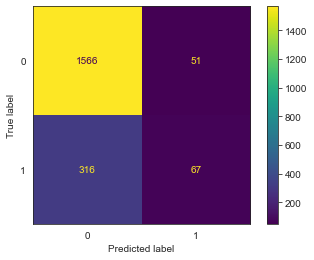

In [26]:
cm = confusion_matrix(y_test, y_hat, labels=best_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_lr.classes_)
disp.plot()
plt.show()

In [27]:
print(classification_report(y_test, y_hat, labels=best_lr.classes_))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1617
           1       0.57      0.17      0.27       383

    accuracy                           0.82      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.78      0.82      0.77      2000



In [28]:
print(precision_score(y_hat, y_test))
print(recall_score(y_hat, y_test))

0.17493472584856398
0.5677966101694916


### Coefficients

In [29]:
log_reg = sm.Logit(y_train, X_train).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.439147
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7989
Method:                           MLE   Df Model:                           10
Date:                Wed, 18 May 2022   Pseudo R-squ.:                  0.1383
Time:                        12:48:51   Log-Likelihood:                -3513.2
converged:                       True   LL-Null:                       -4076.9
Covariance Type:            nonrobust   LLR p-value:                6.057e-236
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0036      0.000    -17.218      0.000      -0.004      -0.003
x2             0.0595      0.003     22.943      0.000       0.054       0.065
x3            -0.0435      0.010     -4.291      0.000      -0.063      -0.024
x4          8.157e-07   5.55e-07      1.469      0.142   -2.72e-07     1.9e-06
x5            -0.3191      0.050     -6.357      0.000      -0.418      -0.221
x6            -0.2129      0.063     -3.364      0.001      -0.337      -0.089
x7            -1.0466      0.063    -16.693      0.000      -1.169      -0.924
x8         -4.801e-07    5.1e-07     -0.941      0.347   -1.48e-06     5.2e-07
x9             0.8060      0.075     10.726      0.000       0.659       0.953
x10           -0.0476      0.078     -0.613      0.540      -0.200       0.105
x11           -0.6511      0.060    -10.925      0.000      -0.768      -0.534
==============================================================================
"""

In [30]:
p_values = list(log_reg.pvalues)

### Results

In [31]:
coefs = best_lr.coef_
tem = np.reshape(coefs, (11,1))
temp_df = pd.DataFrame(data=tem, index=predictors, columns=['Coefficients'], dtype=float)
temp_df['Coefficients'] = round(temp_df['Coefficients'], 4)
temp_df['p_values'] = p_values
temp_df['p_values'] = round(temp_df['p_values'], 4)

temp_df

,Coefficients,p_values
CreditScore,-0.0011,0.0000
Age,0.0714,0.0000
Tenure,-0.0222,0.0000
Balance,0.0000,0.1418
NumOfProducts,-0.1168,0.0000
HasCrCard,-0.0654,0.0008
IsActiveMember,-1.0200,0.0000
EstimatedSalary,0.0000,0.3468
Geography_Germany,0.7705,0.0000
Geography_Spain,0.0051,0.5400


## DessicionTreeClassifier

In [32]:
dt = DecisionTreeClassifier(random_state=5)

param_grid = {'criterion' : ['gini', 'entropy'],
              'splitter' : ['best', 'random'],
              'max_depth' : [None, 3, 5, 9, 14, 20, 30, 70],
              'min_samples_leaf': [2,3,5,9,13],
              'min_samples_split': [2,3,5,9,14],
              'max_features': ['sqrt', 'log2']
              }

clf_dt = GridSearchCV(dt, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_dt_mod = clf_dt.fit(X_train, y_train)
print('DecisionTreeClassifier')
print(best_dt_mod.best_params_)
print(best_dt_mod.best_score_)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
DecisionTreeClassifier
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 9, 'splitter': 'best'}
0.8498750000000002


In [33]:
best_dt = best_dt_mod.best_estimator_
best_dt.fit(X_train, y_train)
y_hat = best_lr.predict(X_test)

### Confusion Matrix

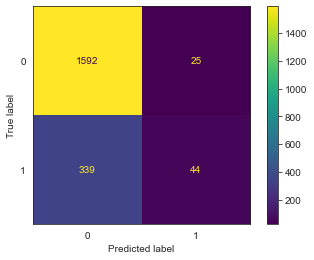

In [34]:
cm = confusion_matrix(y_test, y_hat, labels=best_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt.classes_)
disp.plot()
plt.show()

In [35]:
print(classification_report(y_test, y_hat, labels=best_dt.classes_))

              precision    recall  f1-score   support

           0       0.82      0.98      0.90      1617
           1       0.64      0.11      0.19       383

    accuracy                           0.82      2000
   macro avg       0.73      0.55      0.55      2000
weighted avg       0.79      0.82      0.76      2000



In [36]:
print(precision_score(y_hat, y_test))
print(recall_score(y_hat, y_test))

0.11488250652741515
0.6376811594202898


### Graph

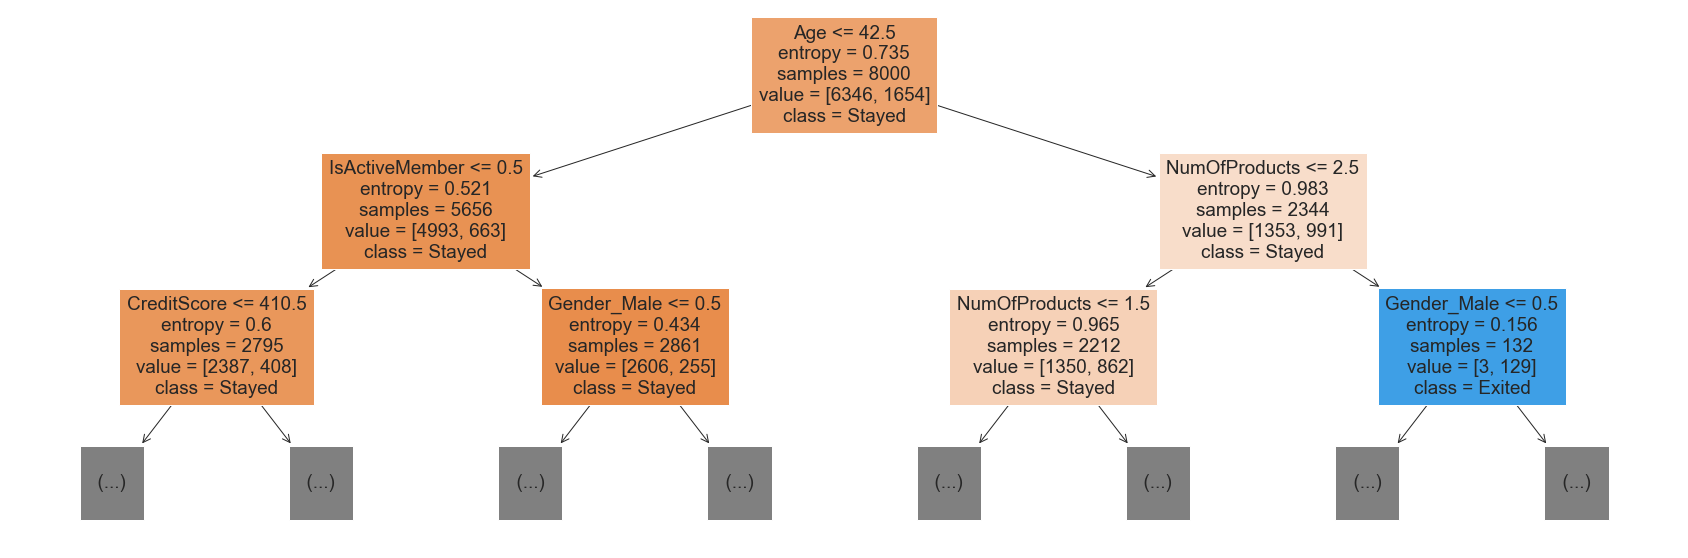

In [37]:
fig = plt.figure(figsize=(30,10))
_ = tree.plot_tree(best_dt,
                   max_depth = 2,
                   feature_names = predictors,
                   class_names = ['Stayed', 'Exited'],
                   filled = True)

In [38]:
train_data.loc[(train_data['Age']>=42.5) & (train_data['NumOfProducts'] >=2.5) & (train_data['Gender_Male']<=0.5),
               'Exited'].value_counts()

1    79
Name: Exited, dtype: int64

## RandomForestClassifier

In [39]:
rf = RandomForestClassifier(random_state=4)

param_grid = {'n_estimators': [100, 200, 400], 
              'max_depth': [3,5,10,20,50,75,100,None]}

clf_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_rf_mod = clf_rf.fit(X_train, y_train)
print('rf')
print(best_rf_mod.best_params_)
print(best_rf_mod.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
rf
{'max_depth': 20, 'n_estimators': 200}
0.866


In [40]:
rf = RandomForestClassifier(random_state=4, max_depth=20, n_estimators=200)
param_grid = {'max_features': [2, 3, 4, 5]}

clf_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_rf_mod = clf_rf.fit(X_train, y_train)
print('rf')
print(best_rf_mod.best_params_)
print(best_rf_mod.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
rf
{'max_features': 3}
0.866


In [41]:
best_rf = best_rf_mod.best_estimator_
best_rf.fit(X_train, y_train)
y_hat = best_rf.predict(X_test)

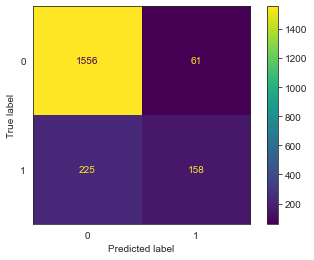

In [42]:
sns.set_style('white')

cm = confusion_matrix(y_test, y_hat, labels=best_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot()
plt.show()

In [43]:
print(classification_report(y_test, y_hat, labels=best_rf.classes_))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1617
           1       0.72      0.41      0.52       383

    accuracy                           0.86      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.84      0.86      0.84      2000



In [44]:
print(precision_score(y_hat, y_test))
print(recall_score(y_hat, y_test))

0.412532637075718
0.7214611872146118


## Ansemble Model

In [45]:
best_lr = best_lr_mod.best_estimator_
best_rf = best_rf_mod.best_estimator_

In [46]:
voting_clf_soft = VotingClassifier(estimators = [('rf',best_rf),('lr',best_lr)], voting = 'soft')

In [47]:
print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())

voting_clf_soft : [0.848125 0.850625 0.856875 0.855625 0.855   ]
voting_clf_soft mean : 0.8532499999999998


In [48]:
voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=20,
                                                     max_features=3,
                                                     n_estimators=200,
                                                     random_state=4)),
                             ('lr',
                              LogisticRegression(C=0.3359818286283781,
                                                 max_iter=2000, penalty='l1',
                                                 random_state=4,
                                                 solver='liblinear'))],
                 voting='soft')

In [49]:
y_hat = voting_clf_soft.predict(X_test)

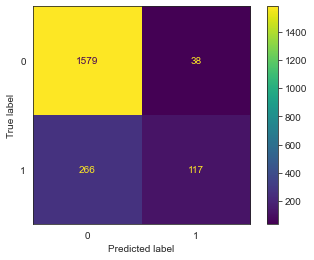

In [50]:
cm = confusion_matrix(y_test, y_hat, labels=voting_clf_soft.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf_soft.classes_)
disp.plot()
plt.show()

In [51]:
print(classification_report(y_test, y_hat, labels=voting_clf_soft.classes_))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1617
           1       0.75      0.31      0.43       383

    accuracy                           0.85      2000
   macro avg       0.81      0.64      0.67      2000
weighted avg       0.84      0.85      0.82      2000



In [52]:
print(precision_score(y_hat, y_test))
print(recall_score(y_hat, y_test))

0.30548302872062666
0.7548387096774194


## ROC Curves

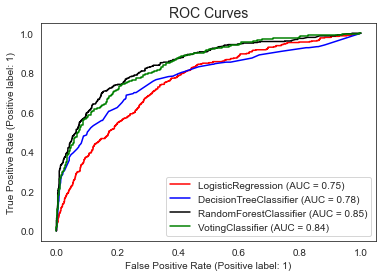

In [53]:
disp = plot_roc_curve(best_lr, X_test, y_test, color='red')
plot_roc_curve(best_dt, X_test, y_test, ax=disp.ax_, color='blue')
plot_roc_curve(best_rf, X_test, y_test, ax=disp.ax_, color='black')
plot_roc_curve(voting_clf_soft, X_test, y_test, ax=disp.ax_, color='green');

plt.title('ROC Curves', size=14);

plt.show()

# Potential Bias and Issues